In [211]:
import matplotlib.pyplot as plt
import math
import numpy as np

In [212]:
R = 4.7E3
C = 10E-9

In [213]:
def circuitoDerivador(s, w1, A0):
    enumerador = (-1)*s*w1*A0
    denominador = (w1*A0/(R*C)+ s*(1/(R*C) + w1) + s*s)
    return enumerador/denominador

In [214]:
f = 10
w1 = f*2*math.pi
A0 = 1E5

In [215]:
frecSize = 500
maxExp = 9
minExp = 0
frequencies = np.logspace(minExp, maxExp, frecSize)  # log scale de 10 rad/sec a 1 M rad/sec
s = 1j * frequencies

In [216]:
response = circuitoDerivador(s, w1, A0)

# Calculo de Frecuencia Resonante Teorica
minVal = min(response)
maxVal = max(np.abs(response))
sRootIndex = np.where(np.abs(response) == maxVal)
wd = frequencies[sRootIndex] 

In [217]:
# Looking for Ganancia = 1
abss = np.abs(response)
zeroS = min(abss)
zeroIndex = np.where(abss == zeroS)
w0 = frequencies[zeroIndex]
w0

array([1.])

In [218]:
# Get coefficients for s
enum = [(-1)*w1*A0, 0]
denom = [1,(1/(R*C) + w1), w1*A0/(R*C)]

In [219]:
Q = np.sqrt((w1*A0/(R*C)))/(w1+1/(R*C))
f0 = wd/2 * 1/np.pi

In [220]:
print(Q)
print(f0)

17.133979357812724
[57138.6995845]


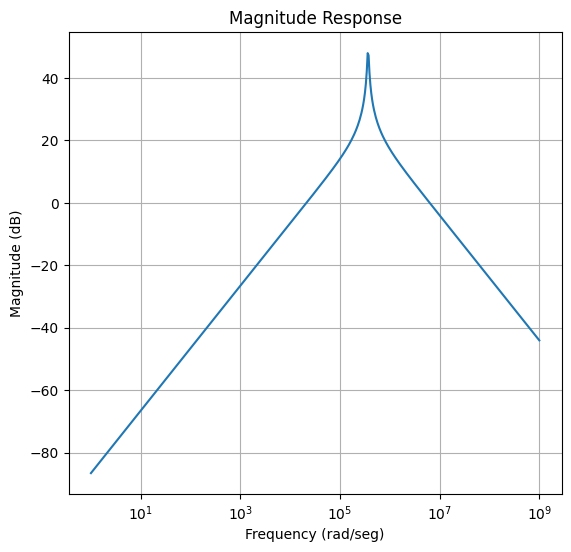

In [221]:
# Bode [Logarithmic]

# Plot magnitude and phase
plt.figure(figsize=(14, 6))

# Magnitude plot
plt.subplot(1, 2, 1)
plt.plot(frequencies, 20 * np.log10(np.abs(response)))
plt.xscale('log')
plt.xlabel('Frequency (rad/seg)')
plt.ylabel('Magnitude (dB)')
plt.title('Magnitude Response')
plt.grid(True)

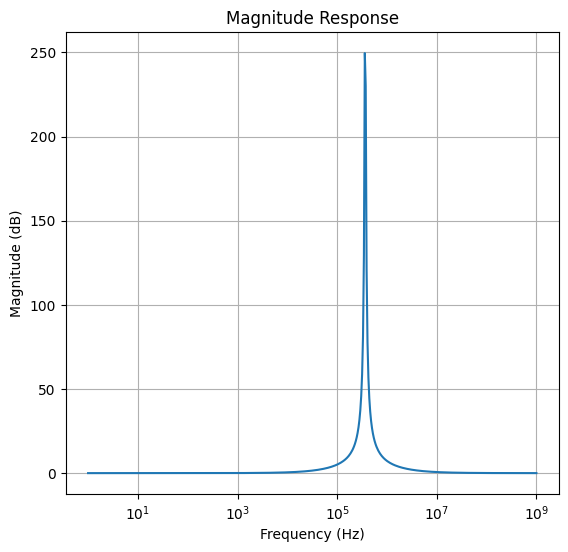

In [222]:
#Non Logarithmic

# Plot magnitude and phase
plt.figure(figsize=(14, 6))

# Magnitude plot
plt.subplot(1, 2, 1)
plt.plot(frequencies, np.abs(response))
plt.xscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.title('Magnitude Response')
plt.grid(True)

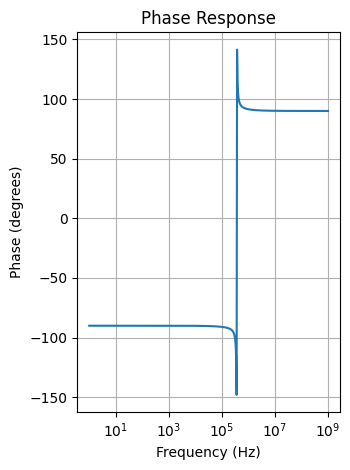

In [249]:
# Phase plot
plt.subplot(1, 2, 2)
plt.plot(frequencies, np.angle(response, deg=True))
plt.xscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (degrees)')
plt.title('Phase Response')
plt.grid(True)

plt.tight_layout()

In [224]:
# Calculate zeros (roots of numerator) and poles (roots of denominator)
zeros = np.roots(enum)
poles = np.roots(denom)

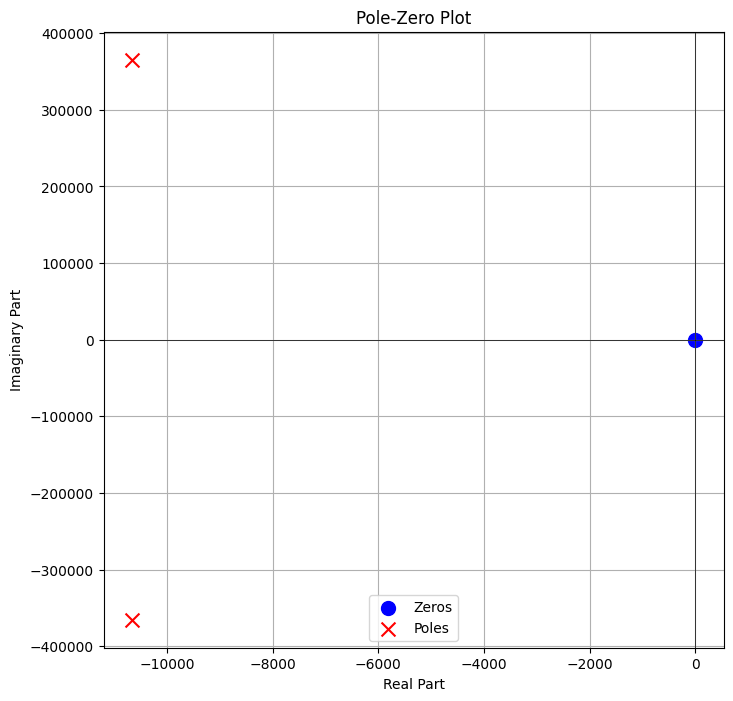

In [225]:
# Plotting poles and zeros
plt.figure(figsize=(8, 8))
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)

# Plot zeros
plt.scatter(np.real(zeros), np.imag(zeros), color='blue', marker='o', s=100, label='Zeros')

# Plot poles
plt.scatter(np.real(poles), np.imag(poles), color='red', marker='x', s=100, label='Poles')

plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.title('Pole-Zero Plot')
plt.grid(True)
plt.legend()


In [226]:
poles

array([-10669.71379888+365473.59819449j, -10669.71379888-365473.59819449j])

In [227]:
zeros

array([0.])

In [261]:
def satCurve(minExpZoom, maxExpZoom):
    frecZoom = np.logspace(minExpZoom,maxExpZoom,frecSize)
    sZoom = frecZoom * 1j
    responseZoom = 13/np.abs(circuitoDerivador(sZoom, w1, A0))

    # Plot magnitude and phase
    plt.figure(figsize=(14, 6))

    # Magnitude plot
    plt.subplot(1, 2, 1)
    plt.plot(frecZoom, responseZoom)
    plt.xscale('log')
    plt.xlabel('Frequency [rad/seg]')
    plt.ylabel('Vin Max [V]')
    plt.title(f'Curva de Saturacion [10^{minExpZoom} - 10^{maxExpZoom} rad/seg]')
    plt.grid(True)



197920.33717615696

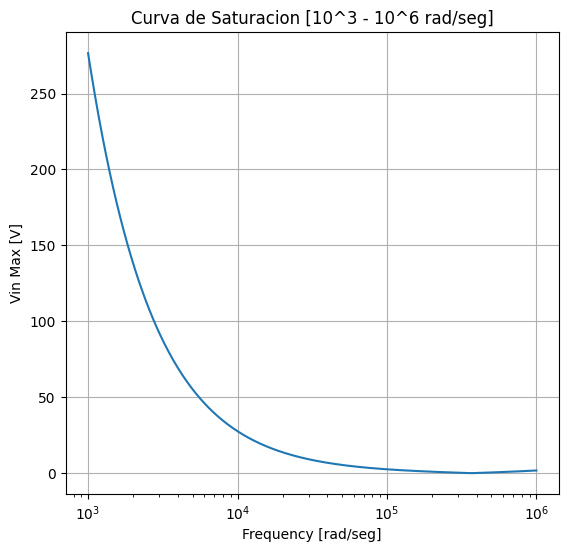

In [263]:
division = np.logspace(3,5,10)
satCurve(3,6)


# Curva de Saturacion Experimental Circuito Derivador
# Saturacion 2Vpp = 31.5 kHz, 195 kHz
# Saturacion 3Vpp = 24 kHz, 240 kHz Sinusoidal
# Saturacion 4Vpp = 17.3 kHz, 
# Saturacion 5Vpp = 13.5 kHz
# Saturacion 10Vpp = 6.8 kHz
# Saturacion 20Vpp = 2.9 kHz

# Sinusoidal Todas las mediciones las hice con la rampa, por ende los resultados no se encuentran asociados a lo experimental
# 3Vpp = 28kHz
# 4Vpp = 21kHz, 245kHz
# 5Vpp = 16.8 kHz, 260 khZ
# 10Vpp = 8.1 kHz, 295 kHz
# 20Vpp = 3.9 kHz, 305 kHz
31.5E3*2*np.pi

In [230]:
3E6/(2*np.pi)

477464.829275686

In [231]:
division

array([  1000.        ,   1668.1005372 ,   2782.55940221,   4641.58883361,
         7742.63682681,  12915.49665015,  21544.34690032,  35938.13663805,
        59948.42503189, 100000.        ])

In [232]:
#Funcion Transferencia Mejorada (A mano)
Rmejora = np.logspace(0, 5, 10)

# Get coefficients for s
def divisorResistivo(Renum, Rmej):
    return Renum/(R+Rmej)
Rmejora.size

Rmejora

array([1.00000000e+00, 3.59381366e+00, 1.29154967e+01, 4.64158883e+01,
       1.66810054e+02, 5.99484250e+02, 2.15443469e+03, 7.74263683e+03,
       2.78255940e+04, 1.00000000e+05])

In [233]:
def circuitoDerivadorMejorado(s, w1, A0, Rmej):
    enumMejorado = (-1)*w1*A0*divisorResistivo(R, Rmej)*s
    denomMejorado = s*s + (1/((R+Rmej)*C) + w1*A0*divisorResistivo(Rmej, Rmej))*s + w1*A0/((R+Rmej)*C)
    return enumMejorado/denomMejorado
wn = np.sqrt(w1*A0/((R+Rmejora)*C))
Q = wn/(1/((R+Rmejora)*C) + w1*A0*divisorResistivo(R, Rmejora))
chi = 1/(2*Q)
wd = wn*((chi*chi)-1)**0.5
pole1 = chi*wn + 1j*wd
pole2 = chi*wn - 1j*wd
np.abs(pole1)

array([4441960.11214022, 4439502.28082979, 4430691.6250841 ,
       4399313.43914303, 4290111.90840135, 3938618.83787625,
       3041714.21456937, 1668846.97712441,  629004.90492873,
        184514.82884279])

In [234]:
# Get coefficients for s
enumMejorado = [(-1)*w1*A0*divisorResistivo(Rmejora[0], Rmejora[0]),0]

denomMejorado = [1, (1/((R+Rmejora[0])*C) + w1*A0*divisorResistivo(R, Rmejora[0])), w1*A0/((R+Rmejora[0])*C)]

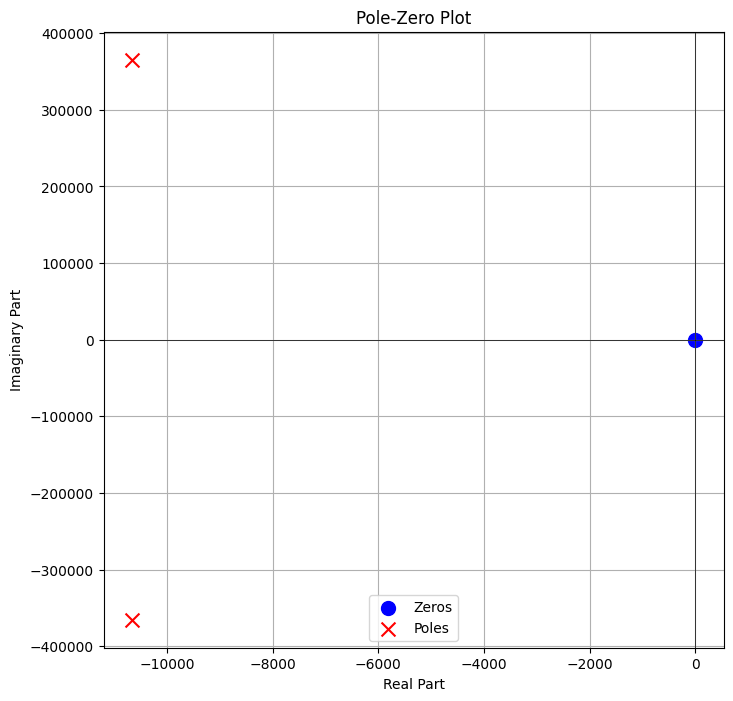

In [235]:
improvedPoles = np.roots(denomMejorado)
improvesZeros = np.roots(enumMejorado)

# Plotting poles and zeros
plt.figure(figsize=(8, 8))
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)

# Plot zeros
plt.scatter(np.real(zeros), np.imag(zeros), color='blue', marker='o', s=100, label='Zeros')

# Plot poles
plt.scatter(np.real(poles), np.imag(poles), color='red', marker='x', s=100, label='Poles')

plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.title('Pole-Zero Plot')
plt.grid(True)
plt.legend()

47.94466905436309


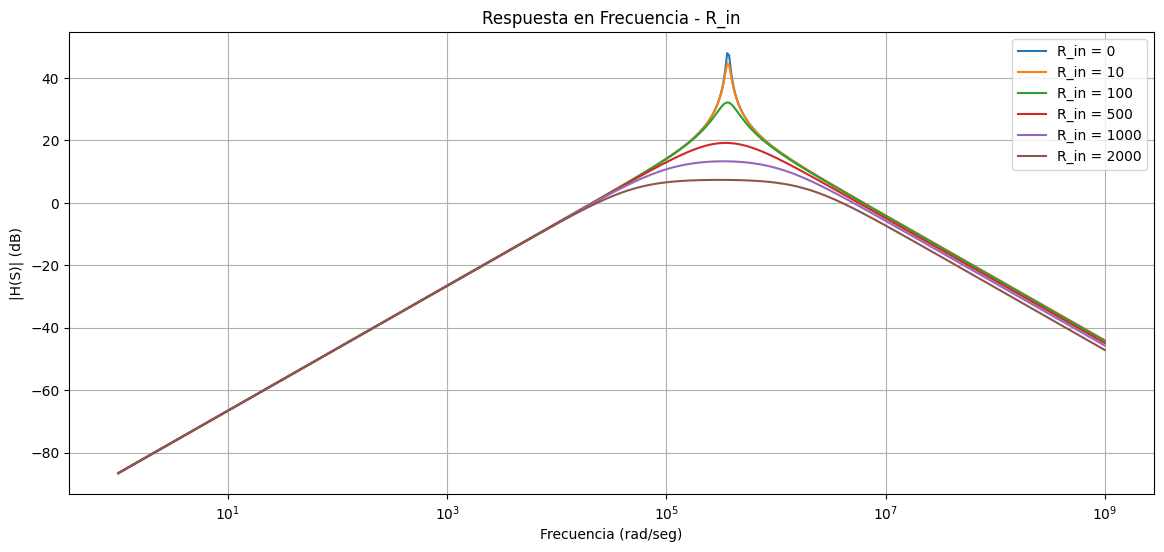

In [254]:
Rmejora = [10, 100, 500, 1000, 2000]

i = 0
plt.figure(figsize=(14, 6))
plt.xscale('log')
plt.xlabel('Frecuencia (rad/seg)')
plt.ylabel('|H(S)| (dB)')
plt.title(f'Respuesta en Frecuencia - R_in')
plt.grid(True)
plt.plot(frequencies, 20 * np.log10(np.abs(response)), label='R_in = 0')
for r in Rmejora:
    responseMejorado = circuitoDerivadorMejorado(s,w1,A0, r)
    # Bode [Logarithmic]
    # Plot magnitude and phase

    # Magnitude plot
    plt.plot(frequencies, 20 * np.log10(np.abs(responseMejorado)), label=f"R_in = {r}")
plt.legend()
print(np.max(20*np.log10(np.abs(response))))

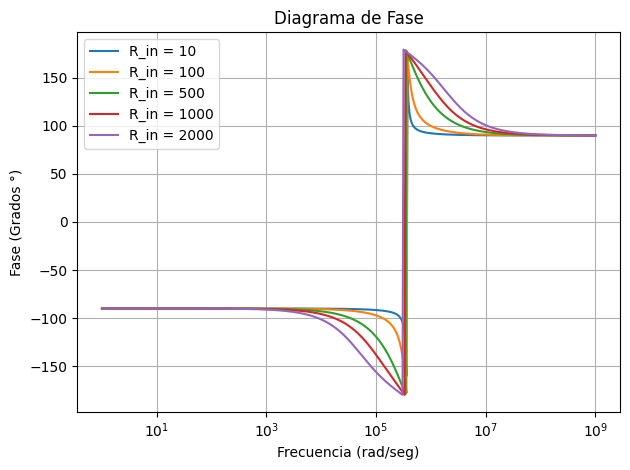

In [260]:

plt.xscale('log')
plt.xlabel('Frecuencia (rad/seg)')
plt.ylabel('Fase (Grados °)')
plt.title('Diagrama de Fase')
plt.grid(True)
for r in Rmejora:
    responseMejorado = circuitoDerivadorMejorado(s,w1,A0, r)
    # Bode [Logarithmic]
    # Plot magnitude and phase

    # Magnitude plot
    plt.plot(frequencies, np.angle(responseMejorado, deg=True), label=f"R_in = {r}")
    # Phase plot
plt.tight_layout()
plt.legend()